## PJ по курсу "Применение машинного обучения для анализа медицинских данных"
## Ольга Юрлова

### ДПО "Data Science in Medicine"

# Проект по применению моделей машинного обучения для предсказания исхода госпитализации лошадей

## Цель проекта:

    1. EDA анализ данных по госпитализации животных (лошадей).
    2. Preprocessing данных
    3. Обучение следующих моделей и сравнение их производительности:
        - HistBoostingClassifier;
        - CatBoostClassifier;
        - RandomForestClassifier.
    4. Определение наиболее эффективной модели мащинного обучения.
    5. Опредление важности признаков для целей обучения модели RandomForestClassifier.
    



Датасет horse.csv включает в себя данные о состоянии здоровья лошадей, которые были госпитализированы для лечения. Он содержит параметры, такие как температура, частота сердечных сокращений, дыхательная частота, а также информацию о наличии операций, возрасте, состоянии слизистых оболочек и уровне боли. Датасет используется для анализа здоровья лошадей и может помочь в диагностике и прогнозировании заболеваний.
Датасет представляет собой .csv файл, содержащий следующие поля:

* **surgery**                : была ли у лошади операция (категориальный: да/нет);
* **age**                    : возраст лошади (категориальный: взрослая/молодая);
* **hospital_number**        : уникальный идентификатор для лошади (числовой);
* **rectal_temp**            : ректальная температура лошади, важный индикатор лихорадки или гипотермии (числовой, в градусах Цельсия);
* **pulse**                  : частота сердечных сокращений (в ударах в минуту), показатель сердечно-сосудистого здоровья (числовой);
* **respiratory_rate**       : количество вдохов в минуту, показатель дыхательного здоровья (числовой);
* **temp_of_extremities**    : температура ног, ушей или других конечностей лошади, указывающая на качество циркуляции (категориальный: холодный/нормальный/прохладный);
* **peripheral_pulse**       : сила периферического пульса лошади, указывающая на здоровье кровообращения (категориальный: нормальный/уменьшенный/отсутствует);
* **mucous_membrane**        : цвет слизистых оболочек лошади (например, десны), часто знак оксигенации или циркуляции крови (категориальный: бледно-розовый/темно-цианозный и т.д.);
* **capillary_refill_time**  : время, необходимое для возвращения цвета слизистым оболочкам после нажатия, отражающее эффективность кровообращения (категориальный: менее_3_сек/более_3_сек);
* **pain**                   : уровень боли, которую испытывает лошадь (категориальный: нет_боли/легкая/экстремальная и т.д.);
* **peristalsis**            : интенсивность перистальтики, указывающая на активность пищеварения (категориальный: нормальная/отсутствует/гипомотильная);
* **abdominal_distention**   : уровень раздутости в животе, возможно, указывающий на колику или вздутие (категориальный: нет/незначительное/тяжелое);
* **nasogastric_tube**       : использовалась ли назогастрическая трубка (категориальный: да/нет);
* **nasogastric_reflux**     : имелся ли рефлюкс (обратный поток) из назогастрической трубки (категориальный: да/нет);
* **nasogastric_reflux_ph**  : уровень pH назогастрического рефлюкса, указывающий на кислотность желудка (числовой);
* **rectal_exam_feces**      : фекальные результаты из ректального обследования, указывающие на здоровье пищеварительной системы (категориальный: нормальные/уменьшенные/отсутствуют);
* **abdomen**                : внешний вид живота при обследовании (категориальный: нормальный/раздутый/другой);
* **packed_cell_volume**     : процент красных кровяных клеток в крови, показатель гидратации или анемии (числовой);
* **total_protein**          : общее количество белка в крови, указывающее на состояние гидратации и питания (числовой);
* **abdomo_appearance**      : внешний вид живота по данным визуализации или осмотра (категориальный: мутный/нормальный и т.д.);
* **abdomo_protein**         : уровень белка в брюшной жидкости, признак инфекции или заболевания (числовой);
* **outcome**                : окончательный результат для лошади (категориальный: выжил/умер/эвтаназирован);
* **surgical_lesion**        : имелось ли хирургическое поражение (категориальный: да/нет);
* **lesion_1**               : код или описание первичного поражения (категориальный или числовой);
* **lesion_2**               : код или описание вторичного поражения, если есть (категориальный или числовой);
* **lesion_3**               : код или описание третичного поражения, если есть (категориальный или числовой);
* **cp_data**                : присутствуют ли клинические патология лошади (категориальный: да/нет).

## Библиотеки и загрузка данных

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\okayu\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.8.2 in c:\users\okayu\appdata\local\programs\python\python39\lib\site-packages (from pandas>=0.24->catboost) (2.8.2)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\okayu\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc

In [4]:
def drop_col(data,col):
    '''удаление колонки'''
    data = data.drop([col], axis=1)
    return data

In [5]:
def value_counts_columns(data):
    '''подсчет значений в колонке'''
    for column in data.columns:
        print(f"Value counts for column: {column}")
        print(data[column].value_counts())
        print("\n")

In [6]:
def replace_values_columns(data,col,val1,val2):
    ''' Замена val1 на val2 в колонке col '''
    data[col] = data[col].replace(val1, val2)
    return data

In [7]:
def missing_values_percent(data):
    ''' процент пропущенных значений '''
    missing_values = data.isnull().sum()
    missing_table = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': missing_values,
    'Percentage Missing': (missing_values / len(df)) * 100
    })
    missing_table = missing_table.sort_values(by='Missing Values', ascending=False).reset_index(drop=True)
    print(missing_table)

In [8]:
def replace_missing_with_nan(data):
    '''замена различных обозначений пропущенных значений на универсальное NaN'''
    missing_values = [np.inf, -np.inf,'', ' ', 'NA', 'N/A', 'NaN', 'nan', '-', '?', 'NULL']
    data = data.replace(missing_values, np.nan)
    return data

In [9]:
def category_mapping(data, col):
    '''кодировка категориальных признаков'''
    for column in col:
        unique_values = data[column].unique()
        mapping = {value: index for index, value in enumerate(unique_values)}
        data[column] = data[column].map(mapping)
    return data

In [10]:
def data_prepare_learning(data,data_target):
    '''подготовка данных к обучению'''
    # Конвертация категориальных переменных в dummy переменные
    X_dummies = pd.get_dummies(data, drop_first=True)  # drop_first=True для уменьшения мультиколлинеарности 
    
    # Разделение на train и test датасеты
    X_train, X_test, y_train, y_test = train_test_split(X_dummies, data_target, test_size=0.2, random_state=42)
    
    # Инициализация StandardScaler
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    # Выделение числовых данных для стандартизации
    numeric_columns = X_train.select_dtypes(include=np.number).columns
    
    # Стандартизация числовых данных
    X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])
    
    return X_train_scaled, X_test_scaled, y_train,y_test

In [11]:
df = pd.read_csv("horse.csv")
df.head().T

,0,1,2,3,4
surgery,no,yes,no,yes,no
age,adult,adult,adult,young,adult
hospital_number,530101,534817,530334,5290409,530255
rectal_temp,38.5,39.2,38.3,39.1,37.3
pulse,66.0,88.0,40.0,164.0,104.0
respiratory_rate,28.0,20.0,24.0,84.0,35.0
temp_of_extremities,cool,NaN,normal,cold,NaN
peripheral_pulse,reduced,NaN,normal,normal,NaN
mucous_membrane,NaN,pale_cyanotic,pale_pink,dark_cyanotic,dark_cyanotic
capillary_refill_time,more_3_sec,less_3_sec,less_3_sec,more_3_sec,more_3_sec


## EDA

In [12]:
# информация о признаках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [13]:
# наименования колонок
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [14]:
# статистика числовых признаков
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
hospital_number,299.0,1087732.70,1532031.58,518476.0,528904.0,530301.0,534736.00,5305629.0
rectal_temp,239.0,38.17,0.73,35.4,37.8,38.2,38.50,40.8
pulse,275.0,72.00,28.65,30.0,48.0,64.0,88.00,184.0
respiratory_rate,241.0,30.46,17.67,8.0,18.0,25.0,36.00,96.0
nasogastric_reflux_ph,53.0,4.71,1.98,1.0,3.0,5.0,6.50,7.5
packed_cell_volume,270.0,46.31,10.44,23.0,38.0,45.0,52.00,75.0
total_protein,266.0,24.27,27.36,3.3,6.5,7.5,56.75,89.0
abdomo_protein,101.0,3.04,1.97,0.1,2.0,2.3,3.90,10.1
lesion_1,299.0,3659.71,5408.47,0.0,2111.5,2322.0,3209.00,41110.0
lesion_2,299.0,90.53,650.64,0.0,0.0,0.0,0.00,7111.0


In [15]:
# статистика категорийных признаков
df.describe(include='object').T

,count,unique,top,freq
surgery,299,2,yes,180
age,299,2,adult,275
temp_of_extremities,243,4,cool,108
peripheral_pulse,230,4,normal,114
mucous_membrane,252,6,normal_pink,79
capillary_refill_time,267,3,less_3_sec,187
pain,244,5,mild_pain,67
peristalsis,255,4,hypomotile,127
abdominal_distention,243,4,none,75
nasogastric_tube,195,3,slight,101


In [16]:
# уникальные значения в колонках
df.nunique().T

surgery                    2
age                        2
hospital_number          283
rectal_temp               40
pulse                     52
respiratory_rate          40
temp_of_extremities        4
peripheral_pulse           4
mucous_membrane            6
capillary_refill_time      3
pain                       5
peristalsis                4
abdominal_distention       4
nasogastric_tube           3
nasogastric_reflux         3
nasogastric_reflux_ph     20
rectal_exam_feces          4
abdomen                    5
packed_cell_volume        50
total_protein             80
abdomo_appearance          3
abdomo_protein            37
outcome                    3
surgical_lesion            2
lesion_1                  61
lesion_2                   6
lesion_3                   2
cp_data                    2
dtype: int64

### Числовые признаки

* Столбец **hospital_number** содержит почти столько же разных значений, сколько элементов (строк) в таблице, и 17 повторений, по части из которых имеется летальный исход, что невозможно с одним и тем же животным. Поскольку данная колонка не содержит релевантной для модели информации, можно ее исключить.
* Столбец **lesion_1** содержит классификационный код хирургического поражения. Поскольку данная колонка не содержит релевантной для модели информации, можно ее исключить.
* Столбец **lesion_2** содержит классификационный код хирургического поражения. Поскольку данная колонка не содержит релевантной для модели информации, можно ее исключить.
* Столбец **lesion_3** содержит классификационный код хирургического поражения. Поскольку данная колонка не содержит релевантной для модели информации, можно ее исключить.

In [17]:
df_pre = drop_col(df,'hospital_number')
df_pre = drop_col(df_pre,'lesion_1')
df_pre = drop_col(df_pre,'lesion_2')
df_pre = drop_col(df_pre,'lesion_3')
df_pre.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,no


In [18]:
value_counts_columns(df_pre)

Value counts for column: surgery
surgery
yes    180
no     119
Name: count, dtype: int64


Value counts for column: age
age
adult    275
young     24
Name: count, dtype: int64


Value counts for column: rectal_temp
rectal_temp
38.0    25
38.5    19
38.3    18
37.8    17
38.2    16
38.1    12
37.5    12
38.6    12
38.4    11
37.9     7
37.2     7
37.6     7
37.7     7
38.7     7
37.3     6
38.8     6
39.2     5
39.5     4
39.3     4
38.9     4
39.0     4
39.4     3
37.1     3
37.4     3
40.3     2
37.0     2
39.1     2
36.5     2
36.9     1
40.8     1
36.6     1
36.1     1
35.4     1
36.0     1
36.8     1
39.6     1
39.9     1
36.4     1
39.7     1
40.0     1
Name: count, dtype: int64


Value counts for column: pulse
pulse
48.0     27
60.0     25
40.0     18
52.0     12
88.0     12
44.0     11
100.0    11
72.0     11
120.0    10
42.0     10
64.0      8
96.0      8
84.0      8
80.0      8
54.0      7
56.0      7
50.0      6
66.0      6
104.0     5
68.0      5
92.0      4
70.0      4
76.0

Имеются только 2 записи со значением 3 в колонке capillary_refill_time. Учитывая смысловое значение данных колонки, и что данных немного, возможно присоединить эти две записи к данным со значением more_3_sec путем замены.

In [19]:
# Замена '3' на 'more'
replace_values_columns(df_pre,'capillary_refill_time','3','more_3_sec')

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,...,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,...,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,...,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,yes


Целевая переменная outcome имеет три значения: lived, died, euthanized, но по смыслу значения died и euthanized указывают на летальный исход. Представляется возможным свести задачу к бинарной классификации: животное выжило или нет.

In [20]:
# Замена 'euthanized' на 'died'
replace_values_columns(df_pre,'outcome','euthanized','died')

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,cloudy,2.0,died,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,...,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,died,no,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,...,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,died,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,...,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,yes


In [22]:
replace_missing_with_nan(df_pre)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,NaN,absent,other,50.0,85.0,cloudy,2.0,died,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,...,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,died,no,no
295,no,adult,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,...,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,died,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,...,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,...,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,yes


<AxesSubplot:>

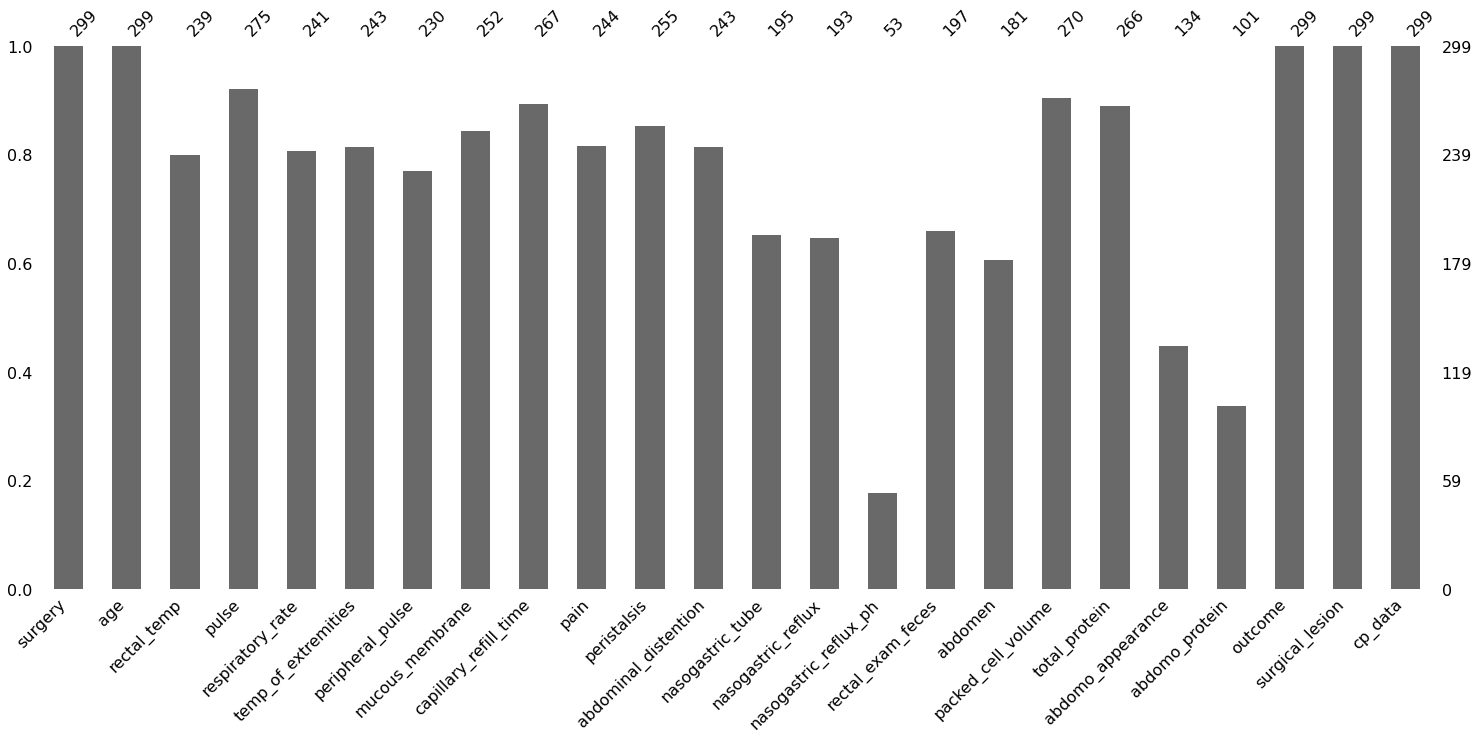

In [23]:
# Проверка пропущенных значений
missingno.bar(df_pre)

In [24]:
missing_values_percent(df_pre)

                   Column  Missing Values  Percentage Missing
0   nasogastric_reflux_ph             246           82.274247
1          abdomo_protein             198           66.220736
2       abdomo_appearance             165           55.183946
3                 abdomen             118           39.464883
4      nasogastric_reflux             106           35.451505
5        nasogastric_tube             104           34.782609
6       rectal_exam_feces             102           34.113712
7        peripheral_pulse              69           23.076923
8             rectal_temp              60           20.066890
9        respiratory_rate              58           19.397993
10   abdominal_distention              56           18.729097
11    temp_of_extremities              56           18.729097
12                   pain              55           18.394649
13        mucous_membrane              47           15.719064
14            peristalsis              44           14.715719
15      

Много колонок имеют количество пропусков, превышающее 20%, что является критическим для многих алгоритмов машинного обучения. Указанные колонки содержат, в основном, категориальную общую информацию, например, степень раздутости живота.

Учитывая небольшое количество данных и невозможность заполнять медицинские данные усредненными величинами, возможно оставить некоторые колонки, например, peripheral_pulse, но будут выбраны алгоритмы, например, Gradient Boosting Models, которые эффективно обрабатывают пропущенные и категориальные данные. Целевая переменная не содержит пропусков.

In [25]:
df_pre = drop_col(df_pre,'nasogastric_reflux_ph')
df_pre = drop_col(df_pre,'abdomo_protein')
df_pre = drop_col(df_pre,'abdomo_appearance')
df_pre = drop_col(df_pre,'abdomen')
df_pre = drop_col(df_pre,'nasogastric_reflux')
df_pre = drop_col(df_pre,'nasogastric_tube')
df_pre = drop_col(df_pre,'rectal_exam_feces')
df_pre.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,died,no,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,no


### Категориальные признаки

Колонки, содержащие переменные бинарного смысла возможно закодировать 0 и 1.

In [26]:
category_mapping(df_pre, ['surgery','age','outcome','surgical_lesion','cp_data'])

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,cp_data
0,0,0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,0,0,0
1,1,0,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,0,0,0
2,0,0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,1,0,1
3,1,1,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,0,1,1
4,0,0,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,55.0,65.0,0,0,0
295,0,0,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,44.0,NaN,0,1,1
296,1,0,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,60.0,6.8,0,1,0
297,1,0,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,50.0,6.0,1,1,1


Оставшиеся категориальные признаки закодируем с помощью dummies переменных при подготовке датасета к обучению.

Оценим корреляцию числовых признаков на correlation matrix.

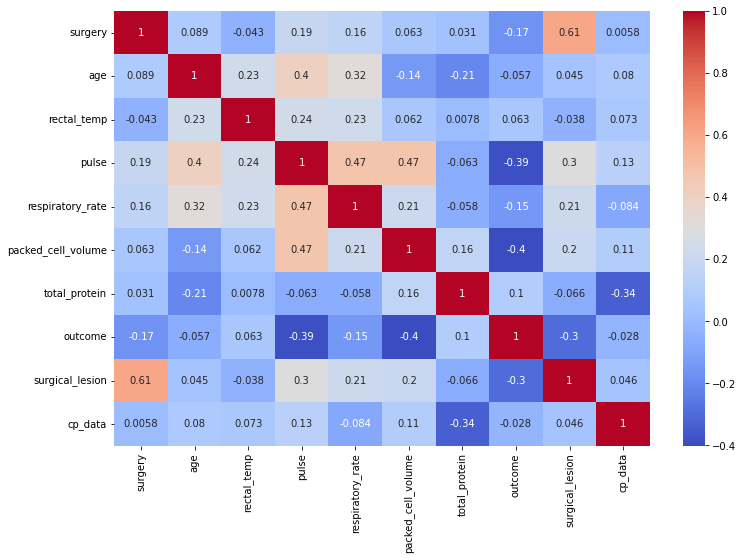

In [27]:
# Корреляция данных на correlation matrix
corr_matrix = df_pre.corr(numeric_only=True,method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Признаки surgery и surgical_lesion сильно коррелируют друг с другом. Необходимо удалить один из нихб например, surgical_lesion.

In [28]:
df_pre = drop_col(df_pre,'surgical_lesion')
df_pre.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,cp_data
0,0,0,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,45.0,8.4,0,0
1,1,0,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,0,0
2,0,0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,1,1
3,1,1,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,0,1
4,0,0,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,74.0,7.4,0,0


In [29]:
df_RFC = df_pre # сохраним текущую версию датасета для предобработки для RandomForestClassifier Model

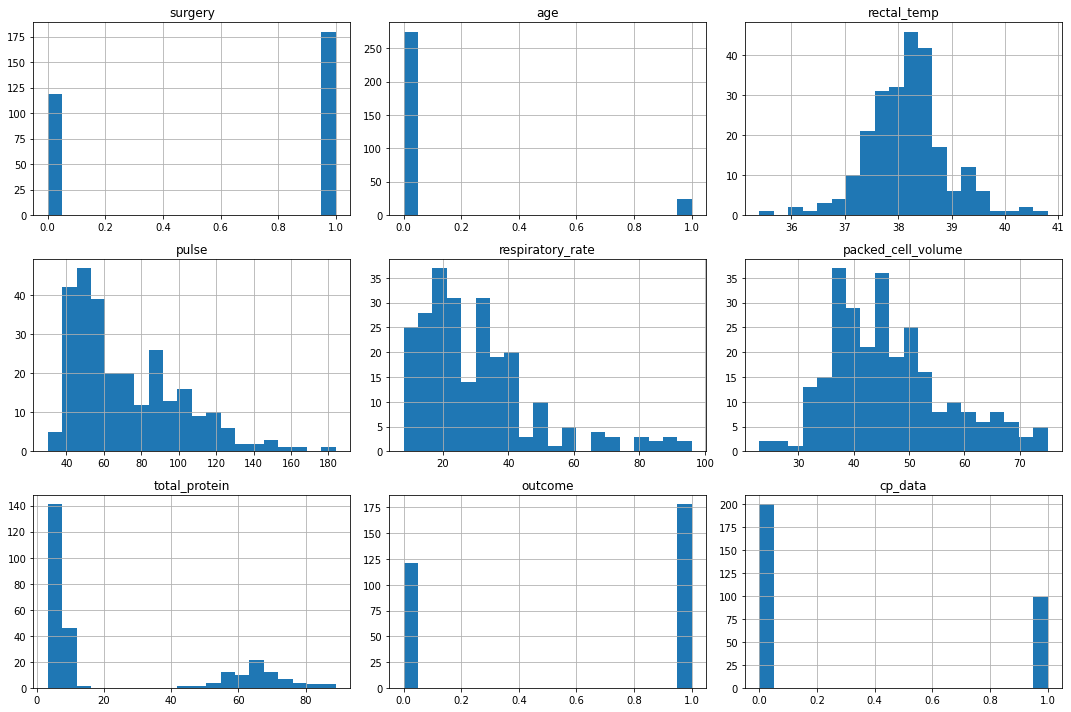

In [30]:
# Построение Plot histogram для числовых признаков
df_pre.select_dtypes(include=np.number).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Данные колонки age сильно не сбалансированы.Большинство госпитализированных животных являются не молодыми. Распределение показателей белка в крови не является нормальным, со странным разрывом в данных между крайне низким показателем и высоким.

## Подготовка датасета к обучению

In [31]:
# Разделение данных на features и target
X = df_pre.drop('outcome', axis=1)
y = df_pre['outcome']

In [32]:
X_train_scaled,X_test_scaled, y_train, y_test = data_prepare_learning(X,y) # подготовка датасета к обучению

In [33]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape

((239, 30), (60, 30), (239,))

In [34]:
y_train.value_counts()

outcome
1    144
0     95
Name: count, dtype: int64

## Обучение моделей

### HistGradientBoostingClassifier

In [35]:
# Инициализация HistGradientBoostingClassifier с заданными параметрами
HGBC_model = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=200,
    max_leaf_nodes=31,
    min_samples_leaf=20,
    random_state=42
)

# Обучение модели
HGBC_model.fit(X_train_scaled, y_train)

# Валидация
y_pred_HGBC_model = HGBC_model.predict(X_test_scaled)

In [36]:
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred_HGBC_model)
print(f"Mean Absolute Error (MAE): {mae}")

# Вычисление accuracy
accuracy_HGBC_model = accuracy_score(y_test, y_pred_HGBC_model)
print("Accuracy:", accuracy_HGBC_model)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_HGBC_model)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_HGBC_model)
print("Classification Report:\n", class_report)

Mean Absolute Error (MAE): 0.2
Accuracy: 0.8
Confusion Matrix:
 [[20  6]
 [ 6 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.82      0.82      0.82        34

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



### Подбор гиперпараметров для модели HistGradientBoostingClassifier

In [37]:
# Определение сетки гиперпараметров
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'max_iter': [50, 100, 200],
    'max_leaf_nodes': [15, 31, 63]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(HGBC_model,
                           param_grid=param_grid, 
                           cv=5,  
                           scoring='accuracy', 
                           )

In [38]:
# Подбор GridSearchCV параметров
grid_search.fit(X_train_scaled, y_train)

best_hgbc = grid_search.best_estimator_

print(f'Best Hyperparameters: {grid_search.best_params_}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 100, 'max_leaf_nodes': 15}


In [39]:
# Предсказание на тестовых данных
y_pred_HGBC_tuned = best_hgbc.predict(X_test_scaled)

In [40]:
# Оценка accuracy
accuracy_HGBC_model__tuned = accuracy_score(y_test, y_pred_HGBC_tuned)
print(f'Accuracy: {accuracy_HGBC_model__tuned * 100:.2f}%')

# Метрики в classification report
print(classification_report(y_test, y_pred_HGBC_tuned))

Accuracy: 80.00%
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.82      0.82      0.82        34

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



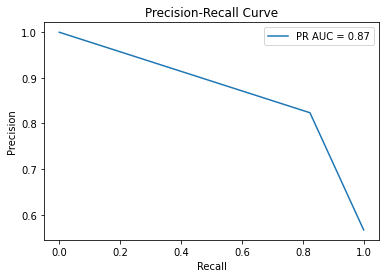

In [42]:
# Присвоение precision и recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_HGBC_tuned)

# вычисление PR AUC, которая хорошо работает в случае несбалансированных данных.
pr_auc = auc(recall, precision)

# Plot
plt.figure()
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Кривая PR AUC показывает компромисс между точностью и полнотой  В медицинской диагностике можно отдать приоритет высокой полноте (минимизации ложноотрицательных результатов), допуская при этом некоторое снижение точности.

Кривая PR AUC результатов работы модели HistGradientBoostingClassifier начинается с высокой точности (близкой к 1,0) и постепенно снижается по мере увеличения полноты. Эта закономерность типична и указывает на то, что модель изначально делает очень мало ложноположительных прогнозов при низкой полноте, но начинает жертвовать точностью, пытаясь охватить больше истинно положительных случаев.
Площадь под кривой (PR AUC) 0,87 довольно хорошая, что говорит о сильном балансе между точностью и полнотой для модели.

### CatBoostClassifier 

CatBoostClassifier может обрабатывать пропуски, так же, как и категориальные переменные внутри алгоритма напрямую. Поэтому вернем датасет без кодированных категориальных переменных.

In [43]:
# Преобразование данных для предобработки
df_pre_CBC = df_pre.copy()
df_pre_CBC = df_pre.replace('normal', 'norm').astype(str)
df_pre_CBC['rectal_temp']=df_pre['rectal_temp'].astype(str)
df_pre_CBC['pulse']=df_pre['pulse'].astype(str)
df_pre_CBC['respiratory_rate']=df_pre['respiratory_rate'].astype(str)
df_pre_CBC['packed_cell_volume']=df_pre['packed_cell_volume'].astype(str)
df_pre_CBC['total_protein']=df_pre['total_protein'].astype(str)

In [44]:
df_pre_CBC.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,cp_data
0,0,0,38.5,66.0,28.0,cool,reduced,nan,more_3_sec,extreme_pain,absent,severe,45.0,8.4,0,0
1,1,0,39.2,88.0,20.0,nan,nan,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,0,0
2,0,0,38.3,40.0,24.0,norm,norm,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,1,1
3,1,1,39.1,164.0,84.0,cold,norm,dark_cyanotic,more_3_sec,depressed,absent,severe,48.0,7.2,0,1
4,0,0,37.3,104.0,35.0,nan,nan,dark_cyanotic,more_3_sec,nan,nan,nan,74.0,7.4,0,0


In [45]:
# Identify categorical features
categorical_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities','peripheral_pulse','mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention','packed_cell_volume','total_protein']

In [46]:
df_pre_CBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   surgery                299 non-null    object
 1   age                    299 non-null    object
 2   rectal_temp            299 non-null    object
 3   pulse                  299 non-null    object
 4   respiratory_rate       299 non-null    object
 5   temp_of_extremities    299 non-null    object
 6   peripheral_pulse       299 non-null    object
 7   mucous_membrane        299 non-null    object
 8   capillary_refill_time  299 non-null    object
 9   pain                   299 non-null    object
 10  peristalsis            299 non-null    object
 11  abdominal_distention   299 non-null    object
 12  packed_cell_volume     299 non-null    object
 13  total_protein          299 non-null    object
 14  outcome                299 non-null    object
 15  cp_data                

In [47]:
# Разделение данных на features и target
X_CBC = df_pre_CBC.drop('outcome', axis=1)
y_CBC = df_pre_CBC['outcome']

In [48]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_CBC, y_CBC, test_size=0.2, random_state=42)

In [49]:
# Инициализация CatBoostClassifier с заданными параметрами
CBC_model = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    depth=6, 
    cat_features=categorical_features, 
    verbose=100
)

# Обучение модели
CBC_model.fit(X_train, y_train)

# Валидация
y_pred_CBC_model = CBC_model.predict(X_test)

0:	learn: 0.6502338	total: 172ms	remaining: 2m 51s
100:	learn: 0.1244667	total: 2.43s	remaining: 21.6s
200:	learn: 0.0538785	total: 4.79s	remaining: 19s
300:	learn: 0.0297733	total: 7.47s	remaining: 17.4s
400:	learn: 0.0202452	total: 9.83s	remaining: 14.7s
500:	learn: 0.0147663	total: 12.1s	remaining: 12s
600:	learn: 0.0117357	total: 14.4s	remaining: 9.56s
700:	learn: 0.0099269	total: 16.7s	remaining: 7.12s
800:	learn: 0.0088649	total: 19.2s	remaining: 4.76s
900:	learn: 0.0077629	total: 21.4s	remaining: 2.35s
999:	learn: 0.0069266	total: 23.7s	remaining: 0us


In [50]:
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred_CBC_model)
print(f"Mean Absolute Error (MAE): {mae}")

# Вычисление accuracy
accuracy_CBC_model = accuracy_score(y_test, y_pred_CBC_model)
print("Accuracy:", accuracy_CBC_model)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_CBC_model)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_CBC_model)
print("Classification Report:\n", class_report)

Mean Absolute Error (MAE): 0.3333333333333333
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[17  9]
 [11 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63        26
           1       0.72      0.68      0.70        34

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.67      0.67      0.67        60



### Подбор гиперпараметров для модели CatBoostClassifier

In [51]:
# Определение сетки гиперпараметров
param_grid = {
    'iterations': [50, 100, 200],           # количество ступеней boosting
    'learning_rate': [0.01, 0.1, 0.2],        # ограничение влияния каждого дерева
    'depth': [4, 6, 10],                      # глубина каждого дерева
    'l2_leaf_reg': [1, 3, 5, 7],              # минимум образцов в листе узла
    'bagging_temperature': [0.1, 1, 5]                   
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=CBC_model,
                           param_grid=param_grid, 
                           cv=5,  
                           scoring='accuracy', 
                           n_jobs=-1,  
                           verbose=0)

In [52]:
# Подбор GridSearchCV параметров
grid_search.fit(X_train, y_train)

best_cbc = grid_search.best_estimator_

print(f'Best Hyperparameters: {grid_search.best_params_}')

0:	learn: 0.6236728	total: 32.6ms	remaining: 6.49s
100:	learn: 0.0869290	total: 2.96s	remaining: 2.9s
199:	learn: 0.0355149	total: 5.59s	remaining: 0us
Best Hyperparameters: {'bagging_temperature': 0.1, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 7, 'learning_rate': 0.2}


In [53]:
# Предсказание на тестовых данных
y_pred_CBC_tuned = best_cbc.predict(X_test)

In [56]:
# Оценка accuracy
accuracy_CBC_tuned = accuracy_score(y_test, y_pred_CBC_tuned)
print(f'Accuracy: {accuracy_CBC_tuned * 100:.2f}%')

# Метрики в classification report
print(classification_report(y_test, y_pred_CBC_tuned))

Accuracy: 75.00%
              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.79      0.76      0.78        34

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



### RandomForestClassifier 

Вернем версию датасета до преобразований для Gradient Boosting Models. Удалим пропущенные значения, обработаем оставшиеся данные и обучим RandomForestClassifier.

In [61]:
df_RFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  packed_cell_volume     270 non-null    float64
 13  total_protein          266 non-null    float64
 14  outcome                299 non-null    int64  
 15  cp_dat

In [62]:
df_RFC.dropna(inplace=True)

In [63]:
missing_values_percent(df_RFC)

                   Column  Missing Values  Percentage Missing
0                 surgery               0                 0.0
1                     age               0                 0.0
2             rectal_temp               0                 0.0
3                   pulse               0                 0.0
4        respiratory_rate               0                 0.0
5     temp_of_extremities               0                 0.0
6        peripheral_pulse               0                 0.0
7         mucous_membrane               0                 0.0
8   capillary_refill_time               0                 0.0
9                    pain               0                 0.0
10            peristalsis               0                 0.0
11   abdominal_distention               0                 0.0
12     packed_cell_volume               0                 0.0
13          total_protein               0                 0.0
14                outcome               0                 0.0
15      

In [64]:
# Разделение данных на features и target
X = df_RFC.drop('outcome', axis=1)
y = df_RFC['outcome']

In [65]:
X_train_scaled,X_test_scaled, y_train, y_test = data_prepare_learning(X,y)

In [66]:
# Инициализация RandomForestClassifier с заданными параметрами
RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на train датасете
RFC_model.fit(X_train_scaled, y_train)

# Валидация
y_pred_RFC = RFC_model.predict(X_test_scaled)

In [67]:
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred_RFC)
print(f"Mean Absolute Error (MAE): {mae}")

# Вычисление accuracy
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print("Accuracy:", accuracy_RFC)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RFC)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_RFC)
print("Classification Report:\n", class_report)

Mean Absolute Error (MAE): 0.2608695652173913
Accuracy: 0.7391304347826086
Confusion Matrix:
 [[ 5  6]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.67      1.00      0.80        12

    accuracy                           0.74        23
   macro avg       0.83      0.73      0.71        23
weighted avg       0.83      0.74      0.72        23



### Подбор гиперпараметров для модели RandomForestClassifier 

In [68]:
# Определение сетки гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],          # количество деревьев в лесу
    'max_depth': [5, 10, 20, None],          # максимальная глубина дерева
    'min_samples_split': [2, 10, 20],        # минимум образцов для разделения узла
    'min_samples_leaf': [1, 5, 10],          # минимум образцов в листе узла
    'bootstrap': [True, False],              # используемый bootstrap при построении дерева
    'criterion': ['gini', 'entropy']         # критерий разделения
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5,  
                           scoring='accuracy', 
                           n_jobs=-1,  
                           verbose=1) 

In [69]:
# Подбор GridSearchCV параметров
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_

print(f'Лучшие гиперпараметры: {grid_search.best_params_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Лучшие гиперпараметры: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [70]:
# Обучение на тестовых данных
y_pred_RFC_tuned = best_rf.predict(X_test_scaled)

In [71]:
# Оценка accuracy
accuracy_RFC_tuned = accuracy_score(y_test, y_pred_RFC_tuned)
print(f'Accuracy: {accuracy_RFC_tuned * 100:.2f}%')

# Метрики в classification report
print(classification_report(y_test, y_pred_RFC_tuned))

Accuracy: 69.57%
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        11
           1       0.63      1.00      0.77        12

    accuracy                           0.70        23
   macro avg       0.82      0.68      0.65        23
weighted avg       0.81      0.70      0.66        23



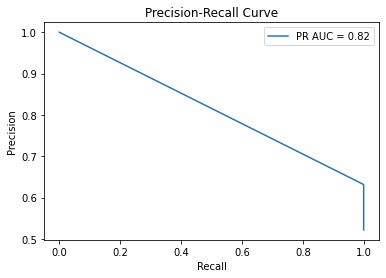

In [72]:
# Присвоение precision и recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_RFC_tuned)

# вычисление PR AUC
pr_auc = auc(recall, precision)

# Plot
plt.figure()
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Производительность модели RandomForestClassifier хорошая, но не идеальная. Поскольку эта модель охватывает больше положительных случаев (увеличивая полноту), она делает это за счет увеличения ложных положительных результатов, что приводит к устойчивому снижению точности.

## Заключение

Сравним полученные метрики accuracy результата работы всех моделей с заданными и оптимизированными параметрами.

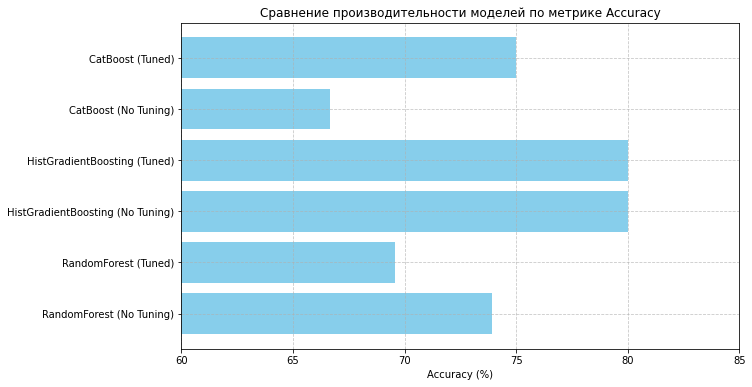

In [73]:
# Визуализация метрики accuracy при реализации различных моделей
models = ['RandomForest (No Tuning)', 'RandomForest (Tuned)', 
          'HistGradientBoosting (No Tuning)', 'HistGradientBoosting (Tuned)',
          'CatBoost (No Tuning)', 'CatBoost (Tuned)']

accuracies = [accuracy_RFC* 100, accuracy_RFC_tuned* 100,
              accuracy_HGBC_model* 100, accuracy_HGBC_model__tuned* 100,
              accuracy_CBC_model* 100, accuracy_CBC_tuned* 100
             ]  

# Plot метрики accuracy моделей
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Сравнение производительности моделей по метрике Accuracy')
plt.xlim(60, 85)  
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Базовая производительность исследованных моделей машинного обучения без настройки и с настройкой гиперпараметров гиперпараметров дают неоднозначные метрики качества обучения. Наилучший результат показала модель HistGradientBoostingClassifier. Модель HistGradientBoostingClassifier строит модели последовательно, исправляя ошибки, допущенные в предыдущих итерациях. Это часто делает ee более точным, чем остальные.

Определим важность признаков на модели RandomForestClassifier.

In [74]:
# Определение важности признаков в модели RandomForestClassifier
feature_importances = best_rf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df.head(3))

               Feature  Importance
5   packed_cell_volume    0.171115
3                pulse    0.144846
23    pain_severe_pain    0.068932


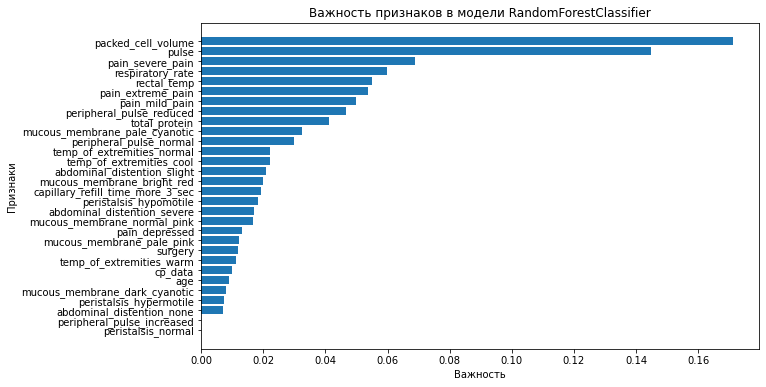

In [75]:
# Plot важности признаков
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.title('Важность признаков в модели RandomForestClassifier')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.gca().invert_yaxis()
plt.show()

Наиболее важными признаками, оказывающим значительное влияние на исход госпитализации лошадей, по результатам анализа данных определены процент красных кровяных клеток в крови('packed_cell_volume') и частота сердечных сокращений ('pulse'). Поскольку процент красных кровяных клеток в крови отражает уровень гидратации или анемии, а частота сердечных сокращений - состояние сердечно-сосудистого здоровья, то они является ключевым маркером общего состояния госптализированных животных и сильным предиктором риска летального исхода. 